In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import july
from matplotlib import colors
from pathlib import Path

In [42]:
def get_colorbars(fig):
    cbs = []
    for ax in fig.axes:
        cbs.extend(ax.findobj(lambda obj: hasattr(obj, "colorbar") and obj.colorbar))
    return [a.colorbar for a in cbs]

In [57]:
upwelling = pd.read_excel('/Users/mikesmith/Downloads/NJ_Upwelling_for_BPU.xlsx', parse_dates=True, index_col='date').drop('Notes', axis=1)
upwelling.head(15)

# df.replace({1: 'Yes', 0: 'No'}, inplace=True)
# ndf = pd.get_dummies(df['AVHRR'])


,AVHRR
date,
2020-06-01,0
2020-06-02,0
2020-06-03,0
2020-06-04,0
2020-06-05,0
2020-06-06,0
2020-06-07,1
2020-06-08,1
2020-06-09,1


In [62]:
tdf = pd.read_excel('/Users/mikesmith/Downloads/radar_sea_breezes_2020_v2.xlsx', [0, 1, 2])
date = []
seabreeze = []
for key, item in tdf.items():
    date.extend(item['Date'].tolist())
    seabreeze.extend(item['Seabreeze'].tolist())

seabreeze = pd.DataFrame(dict(date=date, seabreeze=seabreeze)).dropna().set_index('date')
seabreeze.replace({'y': '1', 'n': '0', 'm': '0'}, inplace=True)
seabreeze.shape

# ndf = pd.get_dummies(new_df['seabreeze'])

(92, 1)

In [63]:
combined= pd.concat([seabreeze, upwelling], axis=1)

In [66]:
combined.to_csv('/Users/mikesmith/Downloads/combined_wind_upwelling.csv')

In [125]:
combined = pd.read_csv('/Users/mikesmith/Downloads/combined_wind_upwelling.csv', index_col=0, parse_dates=[0])
combined.head()

,seabreeze,AVHRR,combined
date,,,
2020-06-01,1,0,seabreeze
2020-06-02,0,0,neither
2020-06-03,0,0,neither
2020-06-04,1,0,seabreeze
2020-06-05,0,0,neither


In [126]:
combined.replace({'neither': 1, 'seabreeze': 2, 'upwelling': 3, 'both': 4}, inplace=True)

In [136]:
import numpy as np
np.linspace(1, 4, 4, endpoint=False)

array([1.  , 1.75, 2.5 , 3.25])

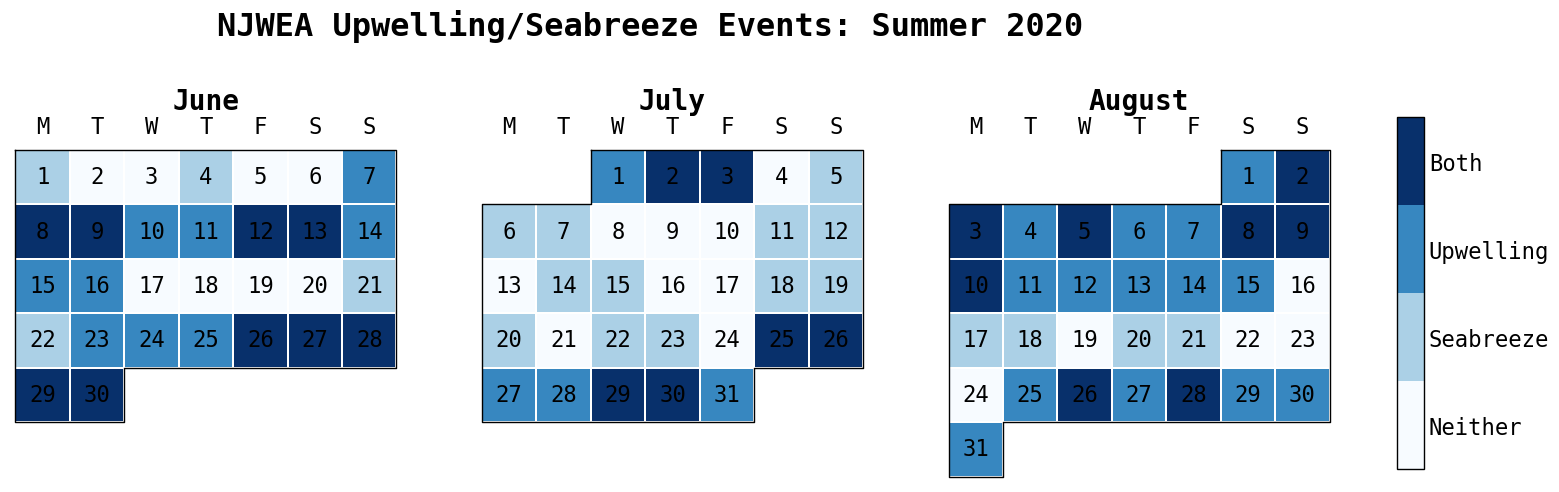

In [141]:
from matplotlib import cm
import numpy as np
cmap = cm.get_cmap('Blues', 4)

rc = {
    "axes.titleweight":'bold',
    "figure.titleweight": "bold"
}

params = {
    "fontsize": 16,
    # "labelsize": 2,
    "titlesize": 20,
    "titlepad": 5,
    "rc_params_dict": rc
}

fig, ax = plt.subplots(1, 3,
                       figsize=(18,5),
                      )

july.month_plot(combined.index, combined['combined'], month=6, date_label=True, weeknum_label=False, ax=ax[0], cal_mode=True, cmap=cmap, title="NJWEA Upwelling/Seabreeze Events: Summer 2020", **params)
july.month_plot(combined.index, combined['combined'], month=7, date_label=True, weeknum_label=False, ax=ax[1], cal_mode=True, cmap=cmap, **params)
july.month_plot(combined.index, combined['combined'], month=8, date_label=True, weeknum_label=False, ax=ax[2], cal_mode=True, cmap=cmap, colorbar=True, **params)

cb = get_colorbars(fig)[0]
cb.set_ticks(np.linspace(1, 4, 8, endpoint=False))
cb.set_ticklabels(['', 'Neither', '', 'Seabreeze', '', 'Upwelling', '', 'Both'])
fig.subplots_adjust(
    top=0.8,
    wspace=.01
)

# plt.subplot_tool()
save_path = Path('/Users/mikesmith/Documents/')
save_name = 'upwelling-seabreeze-combined-2020.png'
plt.savefig(save_path / save_name, facecolor='w', bbox_inches='tight', pad_inches=0.1)

In [ ]:
# fname = '/Users/mikesmith/Downloads/radar sea breezes 2020.xlsx'
fname = '/Users/mikesmith/Downloads/radar_sea_breezes_2020_v2.xlsx'

df = pd.read_excel(fname, [0, 1, 2])
date = []
seabreeze = []
for key, item in df.items():
    date.extend(item['Date'].tolist())
    seabreeze.extend(item['Seabreeze'].tolist())

new_df = pd.DataFrame(dict(date=date, seabreeze=seabreeze)).dropna().set_index('date')
new_df.head() 
new_df.replace({'y': 'Yes', 'n': 'No', 'm': 'No'}, inplace=True)
ndf = pd.get_dummies(new_df['seabreeze'])

cmap = colors.ListedColormap(['white', 'limegreen'])

fig, ax = plt.subplots(1, 3,
                       figsize=(18,5),
                      )

rc = {
    "axes.titleweight":'bold',
    "figure.titleweight": "bold"
}

params = {
    "fontsize": 16,
    # "labelsize": 2,
    "titlesize": 20,
    "titlepad": 5,
    "rc_params_dict": rc
}

july.month_plot(ndf.index, ndf['Yes'], month=6, date_label=True, weeknum_label=False, ax=ax[0], cal_mode=True, cmap=cmap, title="NJWEA Seabreeze Events: Summer 2020", **params)
july.month_plot(ndf.index, ndf['Yes'], month=7, date_label=True, weeknum_label=False, ax=ax[1], cal_mode=True, cmap=cmap, **params)
july.month_plot(ndf.index, ndf['Yes'], month=8, date_label=True, weeknum_label=False, ax=ax[2], cal_mode=True, cmap=cmap, colorbar=True, **params)

cb = get_colorbars(fig)[0]
cb.set_ticklabels(['', 'No', '', '', 'Yes', ''])
fig.subplots_adjust(
    top=0.8,
    wspace=.01
)

# plt.subplot_tool()
save_path = Path('/Users/mikesmith/Documents/')
save_name = 'seabreeze-2020_blue_table.png'
plt.savefig(save_path / save_name, facecolor='w', bbox_inches='tight', pad_inches=0.1)